In [1]:
import sys
sys.path.insert(0, "..")
from eis_toolkit.exploratory_analyses.local_morans_i import local_morans_i

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argum

In [2]:
# Load a built-in dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame with a subset of features
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde',
                     'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti',
                     'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
                     'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
                     'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
                     'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
                     'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
                     'Zambia', 'Zimbabwe']

# Filter the GeoDataFrame for African countries
gdf_test = world[world['name'].isin(african_countries)]

column = "gdp_md_est"


gdf_result = local_morans_i(gdf_test, column, 'knn', 5, 999)

count                                                    42
unique                                                   42
top       POLYGON ((33.90371119710453 -0.950000000000000...
freq                                                      1
Name: geometry, dtype: object
count        42.000000
mean      54425.000000
std       96560.051507
min        1339.000000
25%        7616.500000
50%       16432.000000
75%       48820.000000
max      448120.000000
Name: gdp_md_est, dtype: float64
count    42.000000
mean     -0.080862
std       0.332607
min      -1.288908
25%      -0.180314
50%      -0.017940
75%       0.126799
max       0.258755
Name: gdp_md_est_local_moran_I, dtype: float64
count    42.000000
mean      0.229810
std       0.146475
min       0.004000
25%       0.103500
50%       0.241000
75%       0.366500
max       0.470000
Name: gdp_md_est_p_value, dtype: float64


/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/eis_toolkit/notebooks/../eis_toolkit/exploratory_analyses/local_morans_i.py:31: SettingWithCopyWarning: 
A va

/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


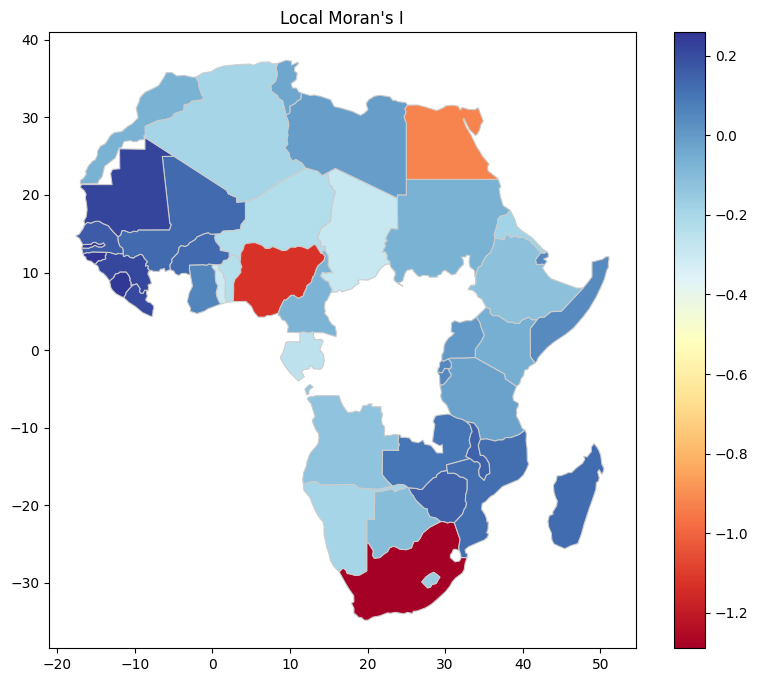

In [4]:
# Plot Moran Scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
gdf_result.plot(column=f'{column}_local_moran_I', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Local Moran\'s I')
plt.show()